# Machine Learning

## Authors

### Óscar Barquero Pérez (<oscar.barquero@urjc.es>), Carlos Figuera Pozuelo (<carlos.figuera@urjc.es>) y Rebeca Goya Esteban (<rebeca.goyaesteban@urjc.es>)

### 27 de marzo de  2016

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Este obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">licencia de Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional</a>. 

## 1 Introducción a la práctica

El objetivo de esta lab es que el alumno se familiarice con los conceptos diferentes aspectos del machine learning, no directamente relacionados con los algoritmos, utilización del módulo [Sklearn](http://scikit-learn.org/stable/). 

## 2 Selección de características usando L1

### 2.1 Regresión Lineal

Uno de los modelos de aprendizaje estadístico más simples, aunque no por ello menos potente, es el modelo de **Regresión Lineal**. 

Como se ha visto en clase de teoría, cuando utilizamos modelos de regresión lineal se asume que el valor de la señal que queremos estimas (predecir), que se conoce como variable respuestas u objetivo, es una combinación lineal de las variables de entrada, también conocidas como variables explicativas. En este caso, el objetivo planteado como un problema de *estimación* es obtener el valor de los coeficientes que multiplican a las variables explicativas, $w_i$. En notación matemática:

$$\hat{y}= w_0 + w_1 x_1 + ... + w_p x_p = \mathbf{w^{T}x}$$

Nomenclatura: los coeficientes $w_i$ se conocen también como pesos; es común que al coeficiencte $w_0$ se le llame *bias*.

En regresión lineal se eligen los coeficientes $\mathbf{w}$ de forma que se minimice el error cuadrático, es decir que el error entre el valor real de $y$ y el proporcionado por nuestro modelo $\hat{y} = \mathbf{w^{T}x}$ sea el menor posible, para todos los valores. Es decir buscamos resolver el siguiente problema de minimización:

$$\underset{w}{min\,} {\left|\left| X w - y\right|\right|_2^2}$$

A este problema de minimización se le puede imponer la siguiente restricción.

$$\underset{w}{min\,} {\left|\left| X w - y\right|\right|_2^2} + \lambda \|w\|_1$$

Esta restricción, dependiendo del valor de $\lambda$ hace que muchos coeficientes del vector $ w$ se hagan cero. 

En la documentación de sklearn se muestra un ejemplo de cómo realizar la selección de características utilizando penalización L1. 

#### Ejercicio 1
Realizar selección de características en el problema de estimar el precio de las casas en Bostón, mediante regresión lineal.

####  Base de datos de regresión

En esta práctica vamos a utilizar la base de datos de los precios de casas en Bostón. Podéis encontrar toda la información en el repositorio de Bases de Datos para Machine Learning [UCI-Boston](http://archive.ics.uci.edu/ml/datasets/Housing)

En la siguiente lista se proporciona la información de las características que se tiene por cada casa.

Attribute Information:

1. *CRIM*: per capita crime rate by town 
2. *ZN*: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. *INDUS*: proportion of non-retail business acres per town 
4. *CHAS*: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. *NOX*: nitric oxides concentration (parts per 10 million) 
6. *RM*: average number of rooms per dwelling 
7. *AGE*: proportion of owner-occupied units built prior to 1940 
8. *DIS*: weighted distances to five Boston employment centres 
9. *RAD*: index of accessibility to radial highways 
10. *TAX*: full-value property-tax rate per $10,000 
11. *PTRATIO*: pupil-teacher ratio by town 
12. *B*: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. *LSTAT*: % lower status of the population 

In [9]:
#read data using pandas
import pandas as pd
import numpy as np

boston_df  = pd.read_csv('boston.csv')



#verify whether ther exisits NaN 
print np.sum(boston_df.isnull())

boston_df

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647422,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
#get names
x_var_names = list(boston_df)[:-1]
print x_var_names
y_var_names = list(boston_df)[-1]
print y_var_names

#get matrix X and vector y

X = boston_df[x_var_names]
y = boston_df[y_var_names]

#some easy checks

print X.shape
print y.shape

#split
import numpy as np
import sklearn
print sklearn.__version__
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print sum(y)
print len(y)
print X_train.shape
print X_test.shape

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
PRICE
(506, 13)
(506,)
0.18.1
11401.6
506
(354, 13)
(152, 13)


In [21]:
from sklearn import linear_model

#build the model
rl_model = linear_model.LinearRegression()

#fit the model

rl_model.fit(X_train,y_train)

y_pred_rl = rl_model.predict(X_test)

#Before we test, let's explore the model

coefs = [rl_model.intercept_]
coefs.extend(list(rl_model.coef_))


labels = ['bias']
labels.extend(x_var_names)

"----"
for n,c in zip(labels,coefs):
    print 
    print n,str(round(c,3)) 
    print "---------------"




bias 37.993
---------------

CRIM -0.12
---------------

ZN 0.044
---------------

INDUS 0.012
---------------

CHAS 2.513
---------------

NOX -16.271
---------------

RM 3.849
---------------

AGE -0.01
---------------

DIS -1.5
---------------

RAD 0.242
---------------

TAX -0.011
---------------

PTRATIO -1.019
---------------

B 0.007
---------------

LSTAT -0.488
---------------


#### Ejercicio 1

Ahora sí. Selección de características, usar L1 y [SelectFromModel](http://scikit-learn.org/stable/modules/feature_selection.html)

In [26]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
#Hay que elegir un hiperparametro que será lambda

print X_train.shape
lscv = LassoCV() #Hará cross validation por dentro
lscv.fit(X_train, y_train) #Por defecto hay 100 lambdas, ejeY = MSE, ejeX = lambda. Se elige una lambda que me de el minimo
# punto de la curva.

models = SelectFromModel(lscv, prefit = True) #Extrae las caracteristicas mejores para el modelo que le pase
#En este caso es LassoCV

X_new = models.transform(X_train)

y_pred_lscv = lscv.predict(X_test)
print X_new.shape

print lscv.coef_

coefs = [lscv.intercept_]
coefs.extend(list(lscv.coef_))

labels = ['bias']
labels.extend(x_var_names)

"----"
for n,c in zip(labels,coefs):
    print 
    print n,str(round(c,3)) 
    print "---------------"

(354, 13)
(354, 10)
[-0.07871024  0.04811545 -0.          0.         -0.          1.65265848
  0.002939   -0.8744929   0.20636471 -0.01408044 -0.8526097   0.00721354
 -0.6777975 ]

bias 40.41
---------------

CRIM -0.079
---------------

ZN 0.048
---------------

INDUS -0.0
---------------

CHAS 0.0
---------------

NOX -0.0
---------------

RM 1.653
---------------

AGE 0.003
---------------

DIS -0.874
---------------

RAD 0.206
---------------

TAX -0.014
---------------

PTRATIO -0.853
---------------

B 0.007
---------------

LSTAT -0.678
---------------


#### Ejercicio 2

Calcular el valor de r2_score para regresión lineal y para el modelo de LassoCV: ¿Cuál es mejor?



In [36]:
from sklearn.metrics import r2_score

print "Regresion lineal -> ", r2_score(y_test, y_pred_rl)
print "LassoCV -> ", r2_score(y_test, y_pred_lscv)

li = linear_model.LinearRegression()
li.fit(X_new, y_train)

X_new_test = models.transform(X_test)

y_pred_newli = li.predict(X_new_test)


print "Regresion lineal new -> ", r2_score(y_test, y_pred_newli)


Regresion lineal ->  0.673528086535
LassoCV ->  0.629296636672
Regresion lineal new ->  0.650229772543


### Principal Component Analysis

En el siguiente ejercicio vamos a realizar un análisis en componente principales, con el objeto de realizar una reducción de la dimensionalidad del problema

#### Ejercicio 2

Realizar PCA sobre los datos de Boston

Usando PCA ->  0.673528086535


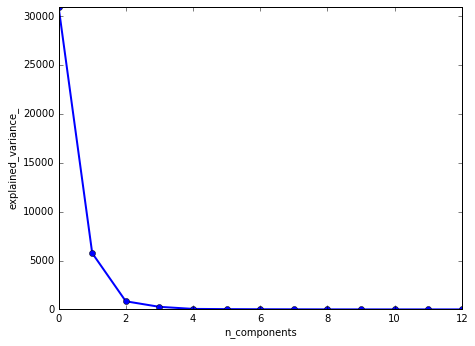

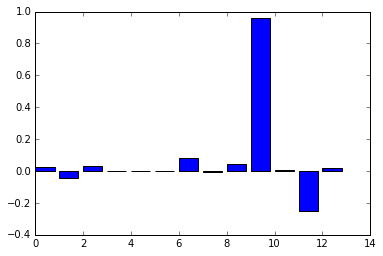

In [60]:
%matplotlib inline

from sklearn import decomposition
import matplotlib.pyplot as plt

pca = decomposition.PCA()
pca.fit(X_train)

X_pca_train = pca.transform(X_train)

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, 'o-', linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

plt.figure()
plt.bar(range(13), pca.components_[0,:])

li_pca = linear_model.LinearRegression()
li_pca.fit(X_pca_train, y_train)

X_test_pca = pca.transform(X_test)
y_pred_pca = li_pca.predict(X_test_pca)

print "Usando PCA -> ", r2_score(y_test, y_pred_pca)

#### Ejercicio 3 Utilizar PCA para modelo RF

En este ejercicio se pide utilizar las componentes de PCA para ajustar un modelo de Random Forest

